## Analysis of Yelp Database

In [2]:
!pip install folium
!pip install geopy


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\asifd\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\asifd\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
import sqlite3
import folium
from geopy.geocoders import Nominatim
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [4]:
# creating database connection
conn = sqlite3.connect('yelp.db')

In [126]:
tables = pd.read_sql("SELECT name from sqlite_master where type='table'",conn)

In [128]:
tables

,name
0,business
1,checkin
2,review
3,tip
4,user


In [132]:
pd.read_sql("SELECT * from review limit 5",conn)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date


In [138]:
for table in tables['name']:
    display(pd.read_sql(f"SELECT * from {table} limit 5",conn))
    

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,"Doctors, Traditional Chinese Medicine, Naturop..."
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,"Shipping Centers, Local Services, Notaries, Ma..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"Department Stores, Shopping, Fashion, Home & G..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"Brewpubs, Breweries, Food"


,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


In [12]:
business_id = pd.read_sql(""" SELECT business_id, review_count from business where lower(categories) like '%restaurant%' and is_open =1""",conn)
business_id

,business_id,review_count
0,MTSW4McQd7CbVtyjqoe9mw,80
1,CF33F8-E6oudUQ46HnavjQ,6
2,bBDDEgkFA1Otx9Lfe7BZUQ,10
3,eEOYSgkmpB90uNA7lDOMRA,10
4,il_Ro8jwPlHresjw9EGmBg,28
...,...,...
34999,w_4xUt-1AyY2ZwKtnjW0Xg,998
35000,l9eLGG9ZKpLJzboZq-9LRQ,11
35001,cM6V90ExQD6KMSU3rRB5ZA,33
35002,WnT9NIzQgLlILjPT0kEcsQ,35


In [14]:
type(business_id)

pandas.core.frame.DataFrame

In [16]:
# Descriptive status for revew count and star rating for businees.

pd.read_sql_query(f"""
    SELECT avg(review_count) as avg_review_count,
            min(review_count) as min_review_count,
            max(review_count) as max_review_count,
            (SELECT review_count FROM business order by review_count LIMIT 1  OFFSET (SELECT count(*) FROM business)/2) as median_review_count,
            avg(stars) as avg_stars,
            min(stars) as min_stars,
            max(stars) as max_stars,
            (SELECT stars from business order by stars LIMIT 1 offset(select count(*) from business)/2) as median_stars
    
    FROM  business 
    WHERE business_id in {tuple(business_id['business_id'])}""", conn).transpose()

,0
avg_review_count,104.097789
min_review_count,5.000000
max_review_count,7568.000000
median_review_count,15.000000
avg_stars,3.523969
min_stars,1.000000
max_stars,5.000000
median_stars,3.500000


In [18]:
def remove_outliers(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 -q1
    lower_bound = q1 - iqr *1.5
    upper_bound = q3 + iqr *1.5
    df=  df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [20]:
business_id =remove_outliers(business_id,'review_count')
business_id.shape
# business_id['review_count'].quartile(0.25)

(31537, 2)

In [22]:
# which restaurants has the highest number of review

pd.read_sql_query(f""" SELECT name, sum(review_count) as review_count, avg(stars) as avg_rating
                    FROM business 
                    WHERE business_id IN  {tuple(business_id['business_id'])}
                    GROUP BY name
                    ORDER BY review_count dESC
                    LIMIT 10""",conn)

,name,review_count,avg_rating
0,McDonald's,16490,1.868702
1,Chipotle Mexican Grill,9071,2.381757
2,Taco Bell,8017,2.141813
3,Chick-fil-A,7687,3.377419
4,First Watch,6761,3.875000
5,Panera Bread,6613,2.661905
6,Buffalo Wild Wings,6483,2.344828
7,Domino's Pizza,6091,2.290210
8,Wendy's,5930,2.030159
9,Chili's,5744,2.514706


In [24]:
# order by rating

pd.read_sql_query(f""" SELECT name, sum(review_count) as review_count, avg(stars) as avg_rating
                    FROM business 
                    WHERE business_id IN  {tuple(business_id['business_id'])}
                    GROUP BY name
                    ORDER BY avg_rating dESC
                    LIMIT 10""",conn)

,name,review_count,avg_rating
0,─ü caf├®,48,5.0
1,two birds cafe,77,5.0
2,the brewers cabinet production,13,5.0
3,taqueria la ca├▒ada,17,5.0
4,la bamba,44,5.0
5,la 5th av tacos,24,5.0
6,el sabor mexican and chinese food,21,5.0
7,eat.drink.Om...YOGA CAFE,7,5.0
8,d4 Tabletop Gaming Cafe,8,5.0
9,cabbage vegetarian cafe,12,5.0


In [26]:
# Do restaurants with higher engagement tend to have higher ratings?

pd.read_sql(""" 
        SELECT business_id,
        sum(length(date) - length(replace(date,',',''))+1) as checkin_count
        from checkin
        group by business_id
       
        """,conn)

,business_id,checkin_count
0,---kPU91CF4Lq2-WlRu9Lw,11
1,--0iUa4sNDFiZFrAdIWhZQ,10
2,--30_8IhuyMHbSOcNWd6DQ,2
3,--7PUidqRWpRSpXebiyxTg,10
4,--7jw19RH9JKXgFohspgQw,26
...,...,...
131925,zznJox6-nmXlGYNWgTDwQQ,67
131926,zznZqH9CiAznbkV6fXyHWA,1
131927,zzu6_r3DxBJuXcjnOYVdTw,23
131928,zzw66H6hVjXQEt0Js3Mo4A,2


In [76]:
pd.read_sql(""" 
        SELECT business_id, count(*)  as tip_count 
        from tip
        group by business_id
""",conn)

,business_id,tip_count
0,---kPU91CF4Lq2-WlRu9Lw,4
1,--0iUa4sNDFiZFrAdIWhZQ,6
2,--30_8IhuyMHbSOcNWd6DQ,1
3,--7PUidqRWpRSpXebiyxTg,3
4,--8IbOsAAxjKRoYsBFL-PA,4
...,...,...
106188,zzjCxn89a7RQo8keIOO_Ag,1
106189,zzjFdJwXuxBOGe9JeY_EMw,2
106190,zznJox6-nmXlGYNWgTDwQQ,6
106191,zzu6_r3DxBJuXcjnOYVdTw,2


In [122]:
review_count_df =pd.read_sql(f""" 
with total as (
    SELECT  b.business_id,
            sum(b.review_count) as review_count,
            avg(b.stars) as avg_rating,
            sum(length(ci.date) - length(replace(ci.date,',',''))+1) as checkin_count,
            sum(tip.tip_count) as tip_count
    FROM 
            business b
    LEFT JOIN 
            checkin ci on b.business_id = ci.business_id
    LEFT JOIN
            (SELECT tip.business_id, count(*)  as tip_count 
                from tip
                group by tip.business_id) as tip
                on tip.business_id= b.business_id
    WHERE b.business_id IN {tuple(business_id['business_id'])}
    GROUP by b.business_id )
    
    SELECT total.avg_rating as rating,
            AVG(total.review_count) as review_count,
            AVG(total.checkin_count) as checkin_count,
            AVG(total.tip_count) as tip_count
            FROM total
        GROUP BY total.avg_rating
""",conn)

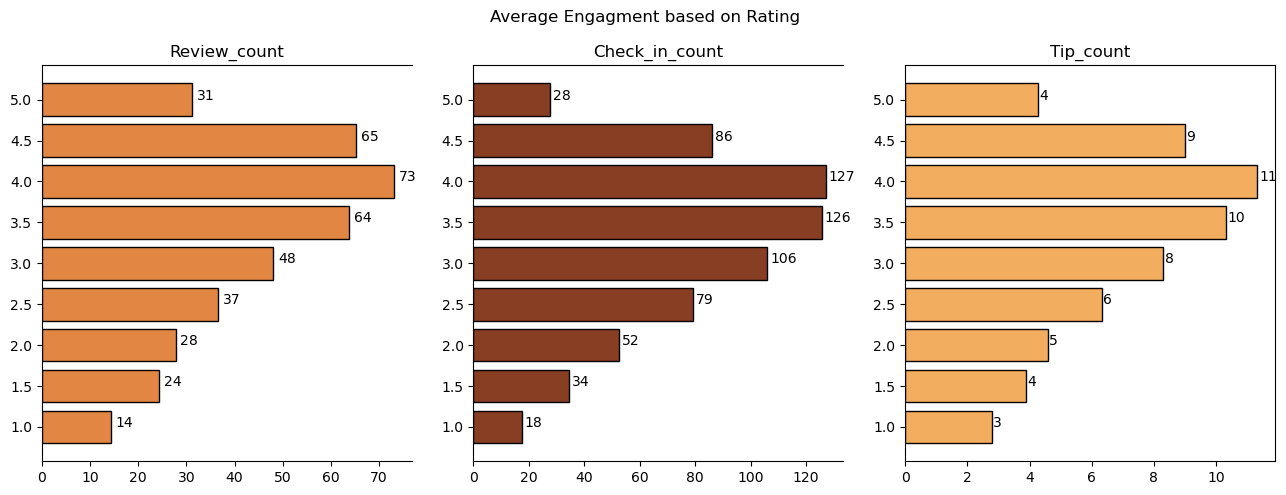

In [123]:

fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13, 5))
fig.suptitle('Average Engagment based on Rating')

ax1.barh(review_count_df['rating'].astype('str'), review_count_df['review_count'],edgecolor='black', color='#e28743')
ax1.set_title("Review_count")
ax1.spines.right.set_visible(False)
for i,v in enumerate(review_count_df['review_count']):
    ax1.text(v+1,i,str(round(v)))

ax2.barh(review_count_df['rating'].astype('str'), review_count_df['checkin_count'],edgecolor='black', color='#873e23')
ax2.set_title("Check_in_count")
ax2.spines.right.set_visible(False)
for i,v in enumerate(review_count_df['checkin_count']):
    ax2.text(v+1,i,str(round(v)))

ax3.barh(review_count_df['rating'].astype('str'), review_count_df['tip_count'], edgecolor='black',color='#f2ad5f')
ax3.set_title("Tip_count")
for i,v in enumerate(review_count_df['tip_count']):
    ax3.text(v+.05,i,str(round(v)))
plt.tight_layout()
plt.show()


In [29]:
# Is there a corelation between the number of reviews,tips and check-ins for a business?
engagement_df =pd.read_sql(f"""
    SELECT  b.business_id,
            sum(b.review_count) as review_count,
            avg(b.stars) as avg_rating,
            sum(length(ci.date) - length(replace(ci.date,',',''))+1) as checkin_count,
            sum(tip.tip_count) as tip_count
    FROM 
            business b
    LEFT JOIN 
            checkin ci on b.business_id = ci.business_id
    LEFT JOIN
            (SELECT tip.business_id, count(*)  as tip_count 
                from tip
                group by tip.business_id) as tip
                on tip.business_id= b.business_id
    WHERE b.business_id IN {tuple(business_id['business_id'])}
    GROUP by b.business_id
    """,conn).dropna()

In [32]:
corr_df=engagement_df[['review_count' ,'checkin_count','tip_count']].corr()

<Axes: >

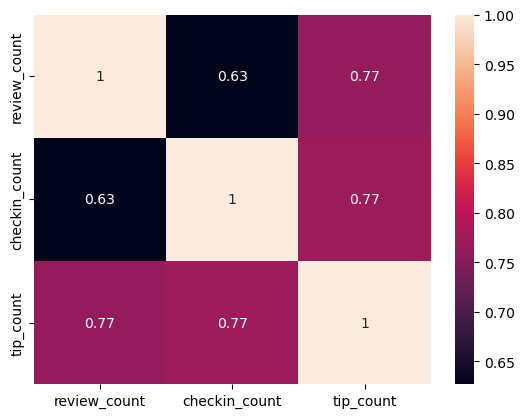

In [34]:
sns.heatmap(corr_df, annot=True)

In [376]:
#Is there a difference in user engagement(reviews,tips and check_ins) between high_rated and low_rated?

category_df =pd.read_sql(f"""
    SELECT  b.business_id,
            sum(b.review_count) as review_count,
            avg(b.stars) as avg_rating,
            sum(length(ci.date) - length(replace(ci.date,',',''))+1) as checkin_count,
            sum(tip.tip_count) as tip_count,
            (CASE WHEN b.stars >= 3.5 THEN 'High-rated' ELSE 'Low-rated' End) as category
    FROM 
            business b
    LEFT JOIN 
            checkin ci on b.business_id = ci.business_id
    LEFT JOIN
            (SELECT tip.business_id, count(*)  as tip_count 
                from tip
                group by tip.business_id) as tip
                on tip.business_id= b.business_id
    WHERE b.business_id IN {tuple(business_id['business_id'])}
    GROUP by b.business_id
    """,conn).dropna()

In [380]:
# Remove outliers
category_df =remove_outliers(category_df,'review_count')
category_df =remove_outliers(category_df,'tip_count')
category_df =remove_outliers(category_df,'checkin_count')

In [382]:
category_df.groupby('category')[['review_count','tip_count','checkin_count']].mean()

,review_count,tip_count,checkin_count
category,,,
High-rated,52.935538,6.502012,62.984304
Low-rated,33.077496,4.758282,54.143043


In [268]:
# function to calculate the success score based on the avg rating and total review count

def cal_success_metric(df):
    success_score=[]
    for index,row in df.iterrows():
        score = row['avg_rating'] * np.log(row['review_count'] +1)
        success_score.append(score)
    return success_score

In [98]:
# How do the success metric (review_count or avg_rating) of resaturants vary across different states
city_df=pd.read_sql(f"""
            SELECT city,state,latitude,longitude, avg(stars) as avg_rating, sum(review_count) as review_count,
            count(*) as restaurant_count
            FROM business
            WHERE business_id IN {tuple(business_id['business_id'])}
            GROUP BY state,city
            ORDER BY review_count desc
            LIMIT 10
                """,conn)

In [100]:
# calculate success score
city_df['success_score'] =  cal_success_metric(city_df)

In [102]:
city_df

,city,state,latitude,longitude,avg_rating,review_count,restaurant_count,success_score
0,Philadelphia,PA,39.955505,-75.155564,3.532156,175487,3001,42.651934
1,Tampa,FL,27.890814,-82.502346,3.571429,104376,1715,41.270588
2,Indianapolis,IN,39.637133,-86.127217,3.412111,92639,1701,39.022521
3,Tucson,AZ,32.338572,-111.010760,3.386187,91613,1419,38.688341
4,Nashville,TN,36.208102,-86.768170,3.493590,87070,1404,39.737764
5,New Orleans,LA,29.963974,-90.042604,3.693676,69239,1012,41.167252
6,Saint Louis,MO,38.583223,-90.407187,3.414303,51490,811,37.042331
7,Reno,NV,39.476518,-119.784037,3.479626,48393,589,37.535187
8,Edmonton,AB,53.436403,-113.604288,3.509379,45916,1546,37.671748
9,Boise,ID,43.611192,-116.206275,3.558824,36104,561,37.346958


In [48]:
# create a base map
m = folium.Map(location=[city_df['latitude'].mean(),city_df['longitude'].mean()], zoom_state=4)

# Define a color scale
color_scale=folium.LinearColormap(colors=['green','yellow','blue'],
                                  vmin =city_df['success_score'].min(),
                                  vmax=city_df['success_score'].max())

# Add markers to map
for index, row in city_df.iterrows():
    folium.CircleMarker(
        location= [row['latitude'],row['longitude']],
        radius =5,
        color=color_scale(row['success_score']),
        fill=True,
        fill_color=color_scale(row['success_score']),
        fill_opacity =0.7,
        popup=f"Success Scores : {row['success_score']}, City   : {row['city']}"
).add_to(m)

#Add color scale to the map
m.add_child(color_scale)
        
    

In [142]:
# Are there any patterns in user engagement over time for successful business compared to less successful business?
# Are there any seasonal trend in the user experience for restaurants

high_rated_engagement = pd.read_sql_query(f"""
            SELECT review.month_year, review.review_count, tip.tip_count
            FROM
                (SELECT strftime('%m-%Y',date) AS month_year, Count(*) As review_count
                FROM review
                WHERE business_id IN {tuple(business_id['business_id'])} and stars >=3.5
                GROUP BY month_year
                ORDER BY month_year) as review
            JOIN 
                (SELECT AVG(b.stars), strftime('%m-%Y',tip.date) AS month_year, COUNT(*) as tip_count
                FROM tip
                JOIN business as b
                ON tip.business_id = b.business_id
                WHERE tip.business_id IN {tuple(business_id['business_id'])} and b.stars >=3.5
                GROUP BY month_year
                ORDER BY month_year) as tip
            ON review.month_year = tip.month_year;
        
            """,conn)

In [144]:
low_rated_engagement = pd.read_sql_query(f"""
            SELECT review.month_year, review.review_count, tip.tip_count
            FROM
                (SELECT strftime('%m-%Y',date) AS month_year, Count(*) As review_count
                FROM review
                WHERE business_id IN {tuple(business_id['business_id'])} and stars <3.5
                GROUP BY month_year
                ORDER BY month_year) as review
            JOIN 
                (SELECT AVG(b.stars), strftime('%m-%Y',tip.date) AS month_year, COUNT(*) as tip_count
                FROM tip
                JOIN business as b
                ON tip.business_id = b.business_id
                WHERE tip.business_id IN {tuple(business_id['business_id'])} and b.stars <3.5
                GROUP BY month_year
                ORDER BY month_year) as tip
            ON review.month_year = tip.month_year;
        
            """,conn)

In [151]:
time_rating = pd.read_sql_query(f"""
    SELECT strftime('%m-%Y',date) As month_year, AVG(stars) as avg_rating
    FROM review
    WHERE business_id IN {tuple(business_id['business_id'])}
    GROUP BY month_year
    ORDER BY month_year   
        """,conn)

In [155]:
time_rating['month_year'] = pd.to_datetime(time_rating['month_year'])
time_rating.sort_values('month_year',inplace=True)

time_rating = time_rating[time_rating['month_year'] >'2017']
time_rating

,month_year,avg_rating
28,2017-02-01,3.636779
45,2017-03-01,3.641116
62,2017-04-01,3.631225
79,2017-05-01,3.632701
96,2017-06-01,3.676874
113,2017-07-01,3.671755
130,2017-08-01,3.686479
147,2017-09-01,3.630508
164,2017-10-01,3.657484
181,2017-11-01,3.678227


In [159]:
high_rated_engagement['month_year'] = pd.to_datetime(high_rated_engagement['month_year'])
high_rated_engagement.sort_values('month_year',inplace=True)

high_rated_engagement = high_rated_engagement[high_rated_engagement['month_year'] >'2017']
high_rated_engagement

,month_year,review_count,tip_count
20,2017-02-01,9607,1677
32,2017-03-01,10852,2101
45,2017-04-01,10734,2124
58,2017-05-01,11590,2019
71,2017-06-01,11723,2015
84,2017-07-01,12548,2056
97,2017-08-01,11582,1843
110,2017-09-01,10335,1597
123,2017-10-01,10961,1644
136,2017-11-01,10298,1483


In [161]:
low_rated_engagement['month_year'] = pd.to_datetime(low_rated_engagement['month_year'])
low_rated_engagement.sort_values('month_year',inplace=True)

low_rated_engagement = low_rated_engagement[low_rated_engagement['month_year'] >'2017']
low_rated_engagement

,month_year,review_count,tip_count
20,2017-02-01,5505,458
32,2017-03-01,6134,555
45,2017-04-01,6195,580
58,2017-05-01,6654,609
71,2017-06-01,6369,574
84,2017-07-01,6910,578
97,2017-08-01,6235,528
110,2017-09-01,5936,441
123,2017-10-01,6136,485
136,2017-11-01,5561,426


In [165]:
high_rated_engagement['avg_rating'] =time_rating['avg_rating'].values
high_rated_engagement

,month_year,review_count,tip_count,avg_rating
20,2017-02-01,9607,1677,3.636779
32,2017-03-01,10852,2101,3.641116
45,2017-04-01,10734,2124,3.631225
58,2017-05-01,11590,2019,3.632701
71,2017-06-01,11723,2015,3.676874
84,2017-07-01,12548,2056,3.671755
97,2017-08-01,11582,1843,3.686479
110,2017-09-01,10335,1597,3.630508
123,2017-10-01,10961,1644,3.657484
136,2017-11-01,10298,1483,3.678227


Text(0.5, 1.0, 'Average Rating over Time')

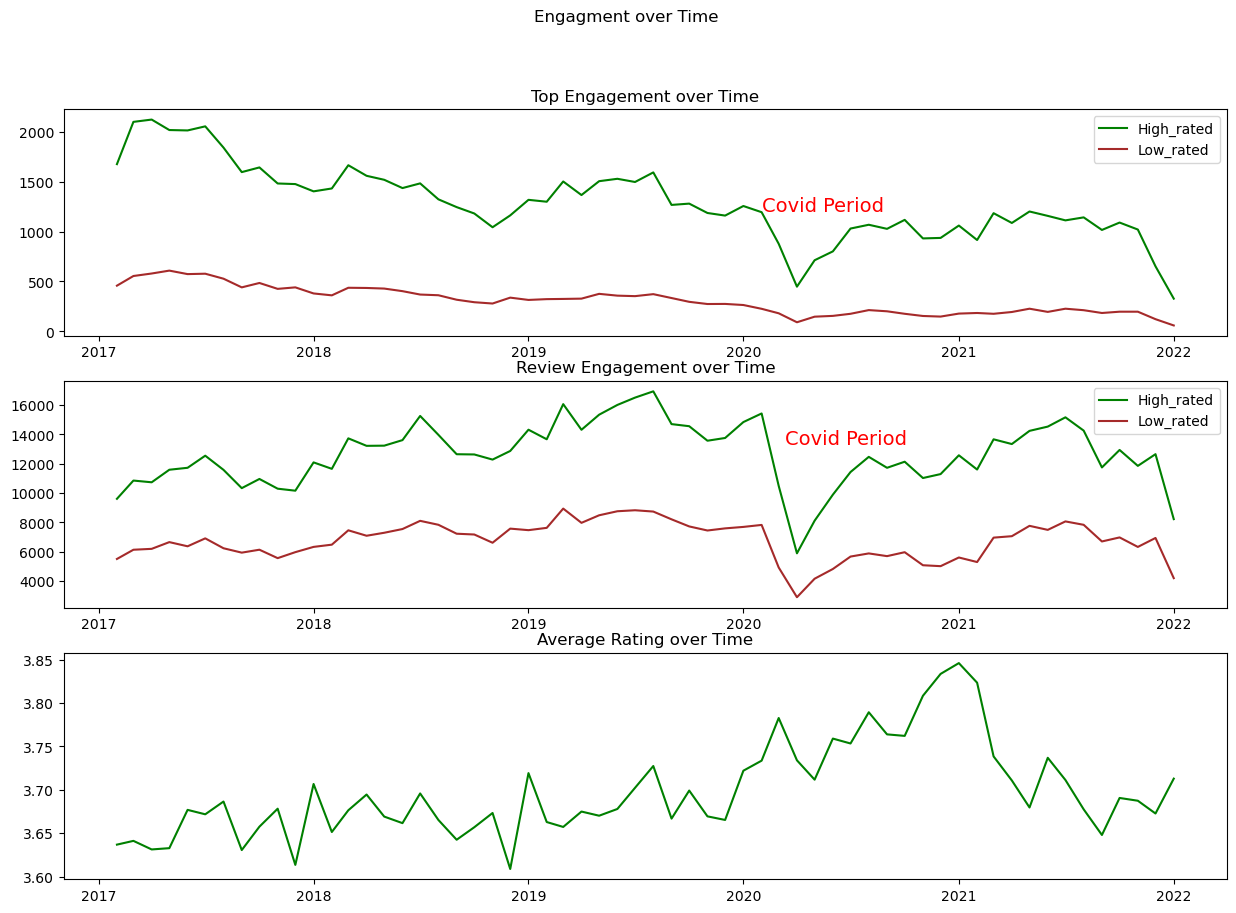

In [247]:
fig,ax = plt.subplots(3,1, figsize=(15,10))
fig.suptitle('Engagment over Time')

ax[0].plot(high_rated_engagement['month_year'], high_rated_engagement['tip_count'], label='High_rated', color='green')
ax[0].plot(low_rated_engagement['month_year'], low_rated_engagement['tip_count'], label='Low_rated', color='brown')
ax[0].legend()
ax[0].set_title('Top Engagement over Time')
ax[0].text(0.6,0.55, 'Covid Period', fontsize=14,color='red',transform=ax[0].transAxes)

ax[1].plot(high_rated_engagement['month_year'], high_rated_engagement['review_count'], label='High_rated', color='green')
ax[1].plot(low_rated_engagement['month_year'], low_rated_engagement['review_count'], label='Low_rated', color='brown')
ax[1].legend()
ax[1].set_title('Review Engagement over Time')
ax[1].text(0.62,0.72, 'Covid Period', fontsize=14,color='red',transform=ax[1].transAxes)

ax[2].plot(time_rating['month_year'], time_rating['avg_rating'], color='green')
ax[2].set_title('Average Rating over Time')

In [249]:
tip_high_rated =high_rated_engagement[['month_year','tip_count']].set_index('month_year')
tip_high_rated

,tip_count
month_year,
2017-02-01,1677
2017-03-01,2101
2017-04-01,2124
2017-05-01,2019
2017-06-01,2015
2017-07-01,2056
2017-08-01,1843
2017-09-01,1597
2017-10-01,1644


In [251]:
review_high_rated =high_rated_engagement[['month_year','review_count']].set_index('month_year')
review_high_rated

,review_count
month_year,
2017-02-01,9607
2017-03-01,10852
2017-04-01,10734
2017-05-01,11590
2017-06-01,11723
2017-07-01,12548
2017-08-01,11582
2017-09-01,10335
2017-10-01,10961


In [253]:
rating_df = time_rating[['month_year','avg_rating']].set_index('month_year')
rating_df

,avg_rating
month_year,
2017-02-01,3.636779
2017-03-01,3.641116
2017-04-01,3.631225
2017-05-01,3.632701
2017-06-01,3.676874
2017-07-01,3.671755
2017-08-01,3.686479
2017-09-01,3.630508
2017-10-01,3.657484


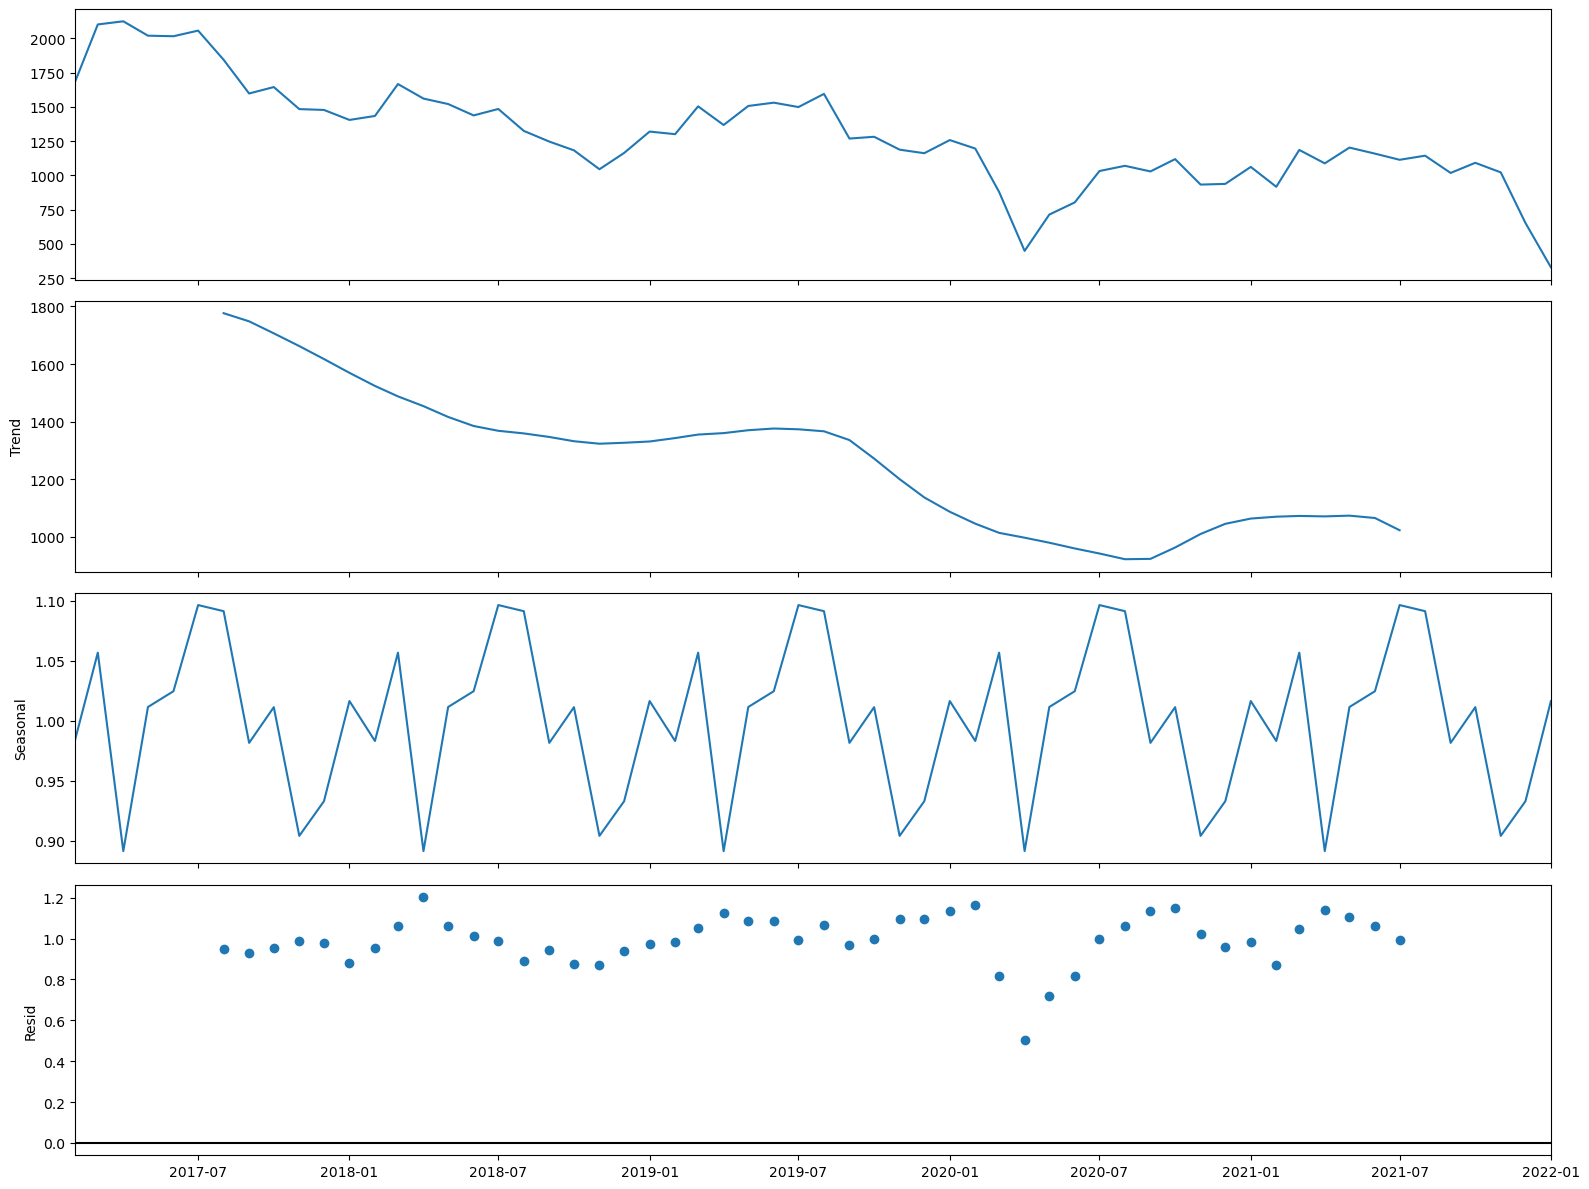

In [257]:
from statsmodels.tsa.seasonal import seasonal_decompose
multiplicative_decomposition = seasonal_decompose(tip_high_rated, model='multiplicative', period = 12)

plt.rcParams.update({'figure.figsize':(16,12)})
multiplicative_decomposition.plot()
plt.show()

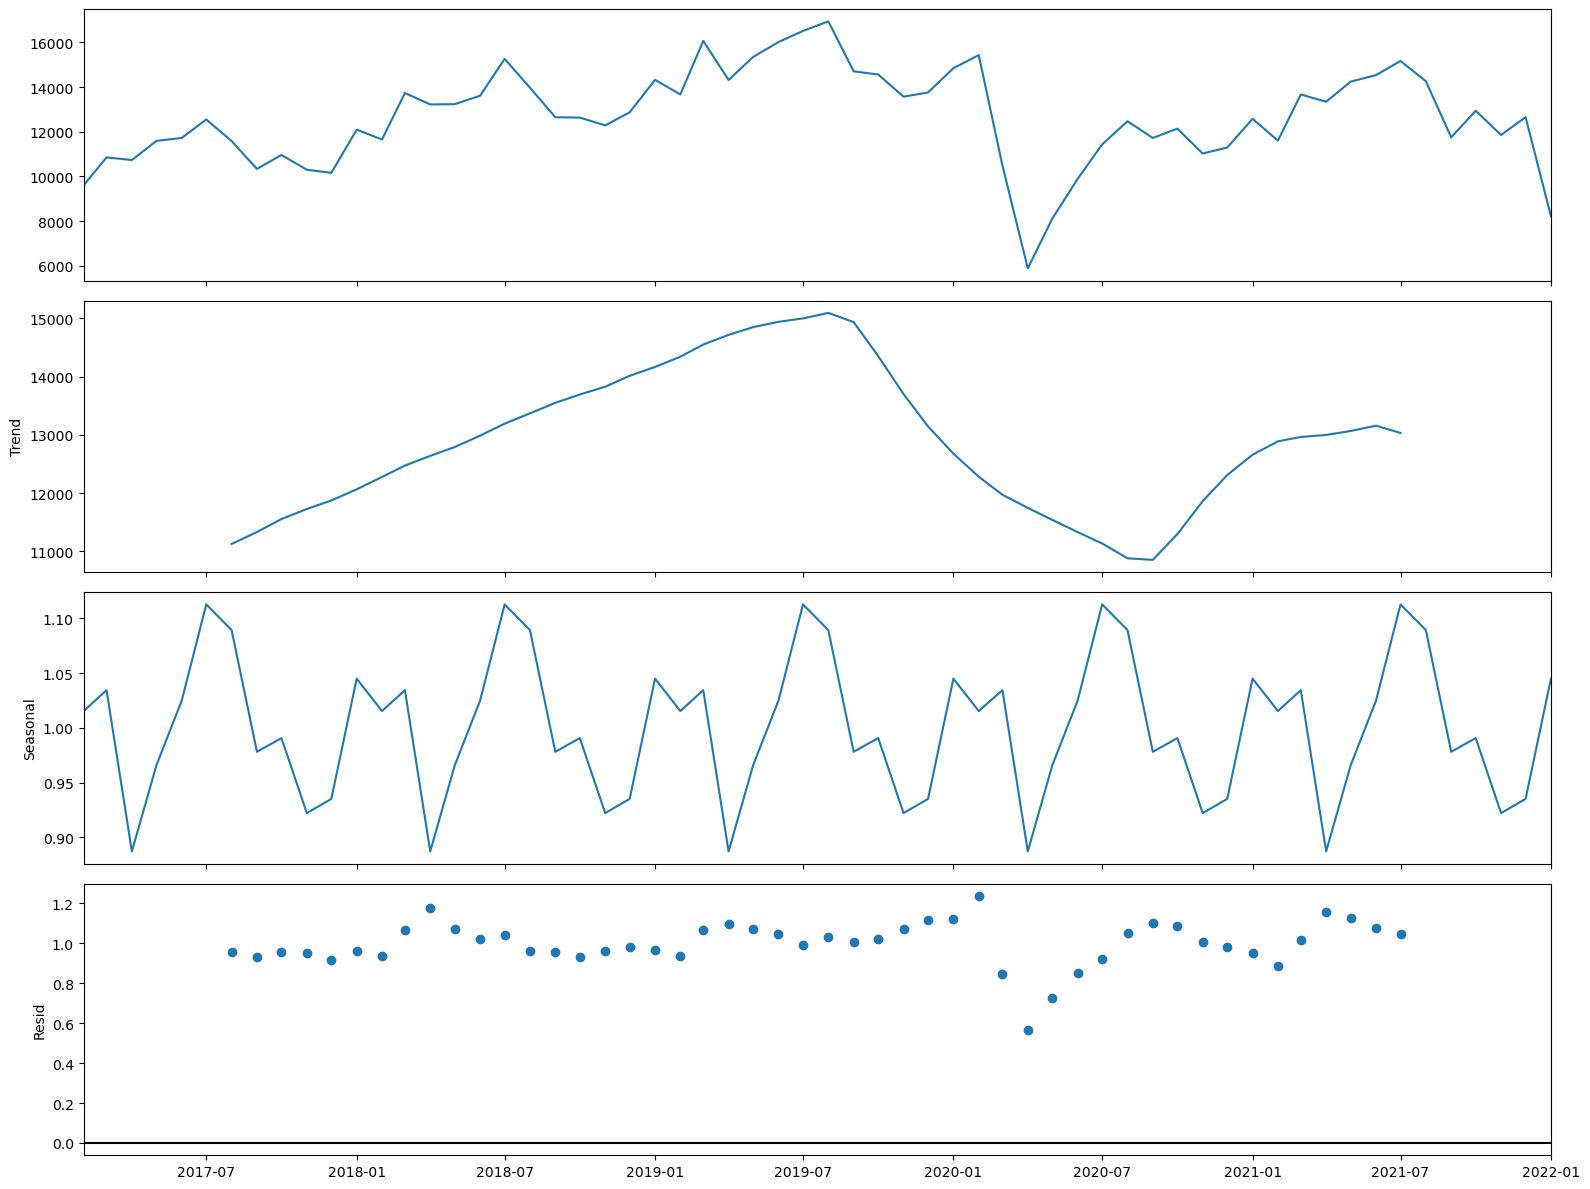

In [259]:
multiplicative_decomposition = seasonal_decompose(review_high_rated, model='multiplicative', period = 12)

plt.rcParams.update({'figure.figsize':(16,12)})
multiplicative_decomposition.plot()
plt.show()

In [270]:
# How does the sentiment of rviews and tips (useful, funny, cool) correlate with the success metrics of restuarant
sentiment_df = pd.read_sql_query(f"""
    SELECT b.business_id, AVG(b.stars) as avg_rating, SUM(b.review_count) as review_count,
    SUM(s.useful_count) as useful_count,
    SUM(s.funny_count) as funny_count,
    SUM(s.cool_count) as cool_count
    FROM
        (SELECT business_id,
            SUM(useful) as useful_count,
            SUM(funny) as funny_count,
            SUM(cool) as cool_count
        FROM
            review
        GROUP BY business_id) as s
    JOIN business as b on b.business_id = s.business_id
    WHERE b.business_id IN {tuple(business_id['business_id'])}
    GROUP BY b.business_id
    ORDER BY review_count
        """,conn)

In [271]:
# Remove outliers in Sentiment_df
sentiment_df = remove_outliers(sentiment_df,'review_count')
sentiment_df = remove_outliers(sentiment_df,'useful_count')
sentiment_df = remove_outliers(sentiment_df,'funny_count')
sentiment_df =remove_outliers(sentiment_df, 'cool_count')

In [274]:
sentiment_df['success_score']=cal_success_metric(sentiment_df)

In [276]:
sentiment_df

,business_id,avg_rating,review_count,useful_count,funny_count,cool_count,success_score
0,-2CPhK6ik9ZBgFX_F-dkxQ,2.0,5,3,5,3,3.583519
1,-3ArWZfDjfab8qVHf3WVtg,4.0,5,18,3,2,7.167038
2,-4lNMmoW7gRxkH0c2dfXfA,4.0,5,1,0,0,7.167038
3,-7UDKbg_8TL4LVuYR6Ooyw,3.0,5,3,0,2,5.375278
4,-AzaeuPwxqFO4SMSKjbuCw,3.0,5,5,0,0,5.375278
...,...,...,...,...,...,...,...
29613,I2_0af3Gu4SyAq4Qdz5cFg,3.0,175,122,26,45,15.511452
29627,radib3GHt_Up9-zhUjM1ew,3.5,175,128,29,21,18.096694
29633,17AnbEkqAiE66YFTDYFvgw,2.5,176,110,25,25,12.940374
29652,ZNZcptwIHne1PDcHaMbA-A,4.0,176,81,13,29,20.704599


In [286]:
sentiment_corr =sentiment_df.iloc[:,2:].corr()
sentiment_corr

,review_count,useful_count,funny_count,cool_count,success_score
review_count,1.000000,0.799899,0.636084,0.646592,0.704351
useful_count,0.799899,1.000000,0.751405,0.798944,0.643288
funny_count,0.636084,0.751405,1.000000,0.719297,0.445179
cool_count,0.646592,0.798944,0.719297,1.000000,0.658839
success_score,0.704351,0.643288,0.445179,0.658839,1.000000


<Axes: >

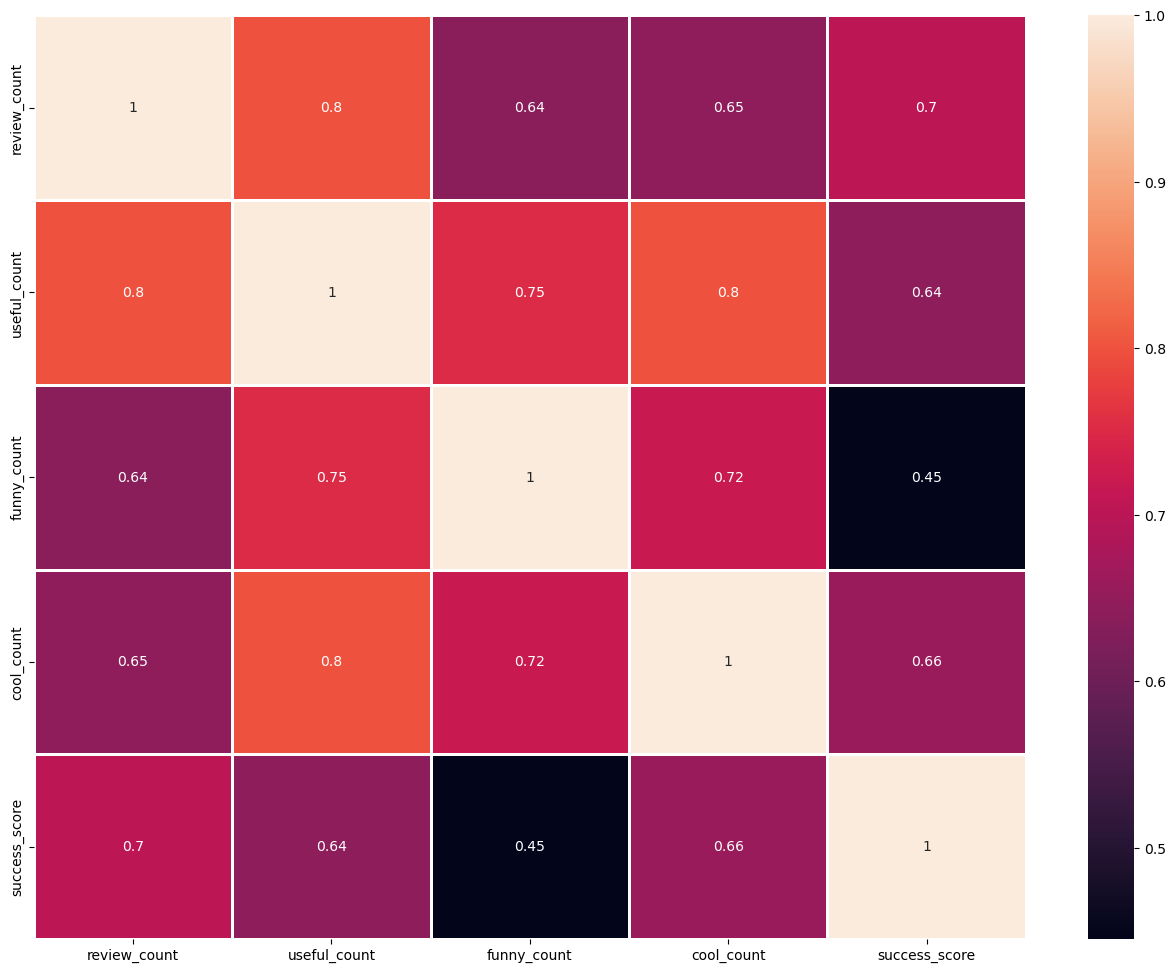

In [292]:
sns.heatmap(sentiment_corr, annot=True, linewidth=1, linecolor='white')

In [296]:
Is thers any difference in engagement of elite users and non elite users?

elite_df= pd.read_sql_query(""" 
    SELECT elite, count(*) as num_users,
    SUM(review_count) AS total_review_count
    FROM
    (SELECT CASE WHEN elite="" THEN 'Not Elite'
            ELSE 'Elite'
            END as elite,
            u.review_count
        FROM
        user u) AS user_elite
    GROUP BY
    elite;
        """,conn)
elite_df

Object `users` not found.


,elite,num_users,total_review_count
0,Elite,91198,20484441
1,Not Elite,1896699,26021235


Text(0.5, 1.0, 'Review Distribution')

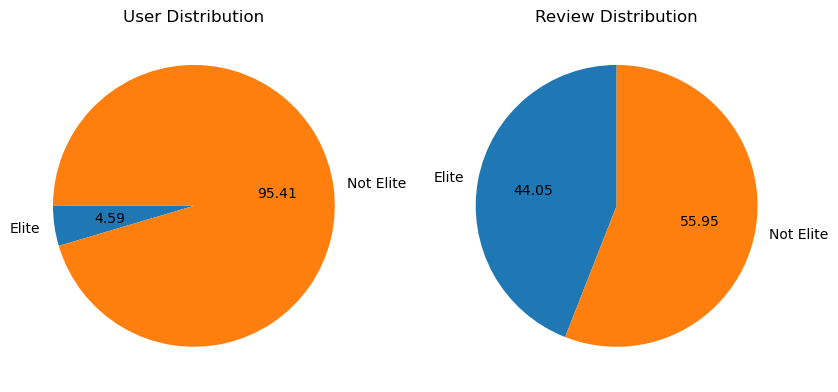

In [298]:
fig,ax= plt.subplots(1,2,figsize=(10,6))
ax[0].pie(elite_df['num_users'],labels = elite_df['elite'], autopct='%.2f', startangle=180)
ax[0].set_title('User Distribution')

ax[1].pie(elite_df['total_review_count'],labels = elite_df['elite'], autopct='%.2f', startangle=90)
ax[1].set_title('Review Distribution')

In [300]:
# what are busiet hours in the restaurants
review_engagement = pd.read_sql_query("""
        SELECT CAST( strftime('%H',date) as integer) as hour,
        COUNT(*) as review_count
        FROM review
        GROUP BY hour;
            """,conn)
review_engagement

,hour,review_count
0,0,460765
1,1,457189
2,2,416472
3,3,339935
4,4,248771
5,5,162636
6,6,100730
7,7,60031
8,8,38078
9,9,30389


In [302]:
tip_engagement = pd.read_sql_query("""
        SELECT CAST( strftime('%H',date) as integer) as hour,
        COUNT(*) as tip_count
        FROM tip
        GROUP BY hour;
            """,conn)
tip_engagement

,hour,tip_count
0,0,74238
1,1,67568
2,2,54532
3,3,40093
4,4,27227
5,5,16977
6,6,10564
7,7,6428
8,8,4213
9,9,3399


In [304]:
check_in =pd.read_sql_query(""" SELECT date from checkin""",conn)
check_in

,date
0,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."
...,...
131925,"2013-03-23 16:22:47, 2013-04-07 02:03:12, 2013..."
131926,2021-06-12 01:16:12
131927,"2011-05-24 01:35:13, 2012-01-01 23:44:33, 2012..."
131928,"2016-12-03 23:33:26, 2018-12-02 19:08:45"


In [385]:
# sample to study
sample=check_in.iloc[0,0]
# print(sample)
split_sample =sample.split(',')
# print(split_sample)
date_list=[]
for i in split_sample:
    print(datetime.strptime(i.strip(),'%Y-%m-%d %H:%M:%S').strftime('%H'))

# List comprenhsion
final_list=[datetime.strptime(i.strip(),'%Y-%m-%d %H:%M:%S').strftime('%H') for i in split_sample]
# final_list

21
22
22
21
21
17
21
21
21
15
16


In [384]:
check_in_engagement=[]
for i in check_in['date']:
    check_in_engagement.extend([datetime.strptime(j.strip(),'%Y-%m-%d %H:%M:%S').strftime('%H') for j in i.split(',')])




In [354]:
# sample to test
check_df = pd.DataFrame(check_in_engagement).astype('int').groupby(0)[0].count()

In [370]:
check_in_engage_df = pd.DataFrame(check_in_engagement).astype('int').groupby(0)[0].count()

Text(0.5, 1.0, 'Checkin Engagement over the hours')

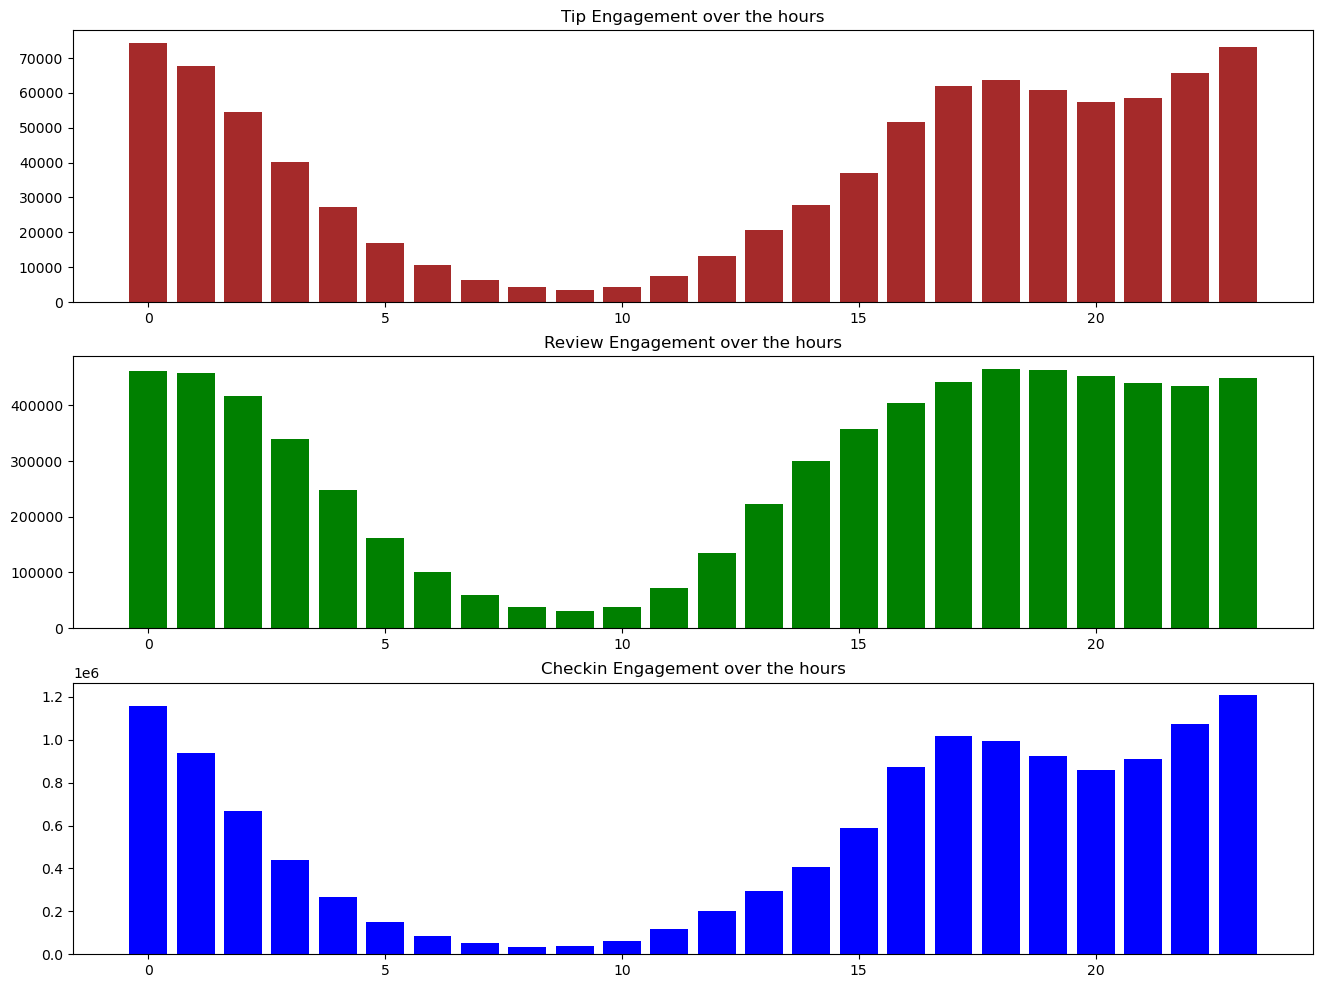

In [368]:
# plotting

fig,ax =plt.subplots(3,1,figsize=(16,12))

ax[0].bar(tip_engagement['hour'],tip_engagement['tip_count'],color='brown')
ax[0].set_title('Tip Engagement over the hours')

ax[1].bar(review_engagement['hour'],review_engagement['review_count'],color='green')
ax[1].set_title('Review Engagement over the hours')

ax[2].bar(check_in_engage_df.index,check_in_engage_df.values,color='blue')
ax[2].set_title('Checkin Engagement over the hours')